# Homework

In [1]:
%matplotlib inline

### Download MNIST data set
do this only once

```bash
    sudo apt install curl
    pip3 install --user mlxtend sklearn numpy matplotlib
    curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
    curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
    gunzip t*-ubyte.gz
```

In [53]:
# !pip3 install --user mlxtend sklearn numpy matplotlib
# !curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# !curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# !gunzip t*-ubyte.gz

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.data import loadlocal_mnist

import solution

np.random.seed(42)

### Load dataset

In [5]:
X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')

In [6]:
X.shape, y.shape

((60000, 784), (60000,))

### We have to decide whether number is 3 or 1

In [7]:
X, y = np.concatenate([X[y == 3], X[y==1]]), np.concatenate([np.full(y[y == 3].shape, 0), np.full(y[y == 1].shape, 1)])

In [8]:
X.shape, y.shape

((12873, 784), (12873,))

### Sample of MNIST dataset

Number:  3


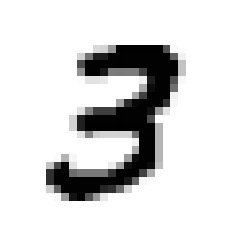

In [47]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
print("Number: ", 3 if y[0] == 0 else 1)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Your turn!
Preprocess data, build model and train it. Feel free to use everything you know :)

Use notebook from logistic regression as cheat sheet

**Hint:** Order of tasks:
 - analize dataset **perhaps we need to normalize data**
 - validate dataset **do we need this?**
 - define squashing function **I recommend you to use sigmoid**
 - define loss, gradient descent 
 - train your model :)

In [48]:
# Type your code here


### Check your models accuracy and f1 score
y_hat should have shape (2873,) sometimes you have to transpose the results!

In [ ]:
accuracy_score(y_test, y_hat)

In [ ]:
f1_score(y_test, y_hat)

### Compare your model with my

In [10]:
predict = solution.forward_propagation

X_train, y_train, X_test, y_test = solution.preprocess(X, y)

model, _ = solution.fit(X_train, y_train, 0.1, epochs=100)

y_hat, *_ = solution.forward_propagation(X_test.T, model)

y_hat[y_hat >= 0.5] = 1
y_hat[y_hat < 0.5] = 0

In [45]:
accuracy_score(y_test, y_hat.T)

0.9860772711451444

In [46]:
f1_score(y_test, y_hat.T)

0.9929898352611286